In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

c_names = [ 'Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
         'Hue','OD280/OD315 of diluted wines','Proline']

df = pd.read_csv('wine.data', names =c_names )
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
df.skew(axis=0)

Class                           0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

In [ ]:
# Check_skew Function will plot the Box, Hist and Probabilty plot of the Dataframe and Feature provided,
# And also display the Skewness on the top of HistPlot

def Check_skew(df,feature):
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.boxplot(ax=axes[0],data=df,y=feature)   # For Plotting Boxplot on 1st plot axes
    axes[0].set_title(f"{feature} BoxPlot")     # BoxPlot title
    
    sns.histplot(ax=axes[1],data=df,x=feature,kde=True,color='red')     # For Plotting Histplot on 2nd plot axes
    axes[1].set_title(f"{feature} HistPlot")                            # HistPlot title
    
    scipy.stats.probplot(df[feature], sparams=(), dist='norm', fit=True, plot=axes[2], rvalue=False)    # For Plotting ProbabilityPlot on 3rd plot axes
    axes[2].set_title(f"{feature} Probabiltity Plot")                                                   # ProbabilityPlot title
    
    axes[1].annotate(round(df[feature].skew(),3), xy=(max(df[feature])*.95, 27), xytext=(max(df[feature])*.99, 27),    # For displaying the Skewness Value
                     fontsize=12, color='green', ha='right', va='top')
    plt.show()

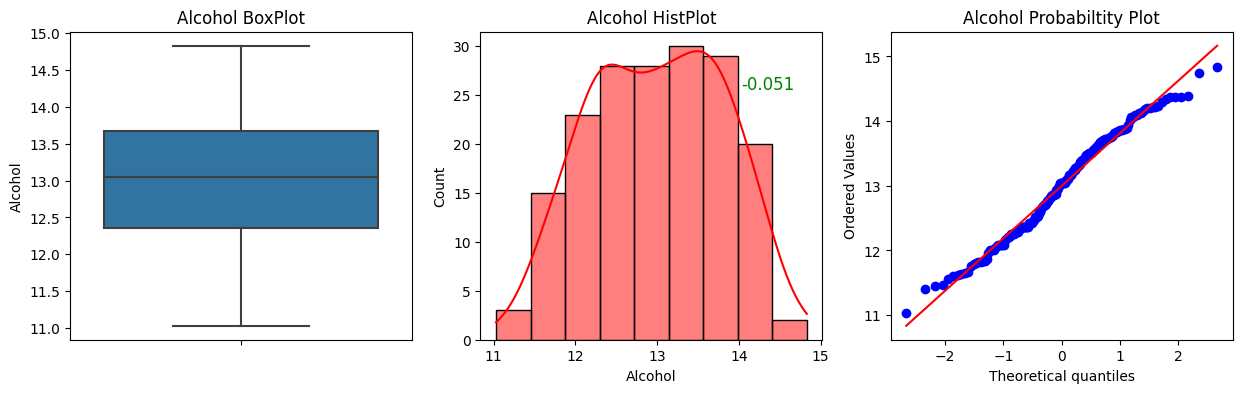

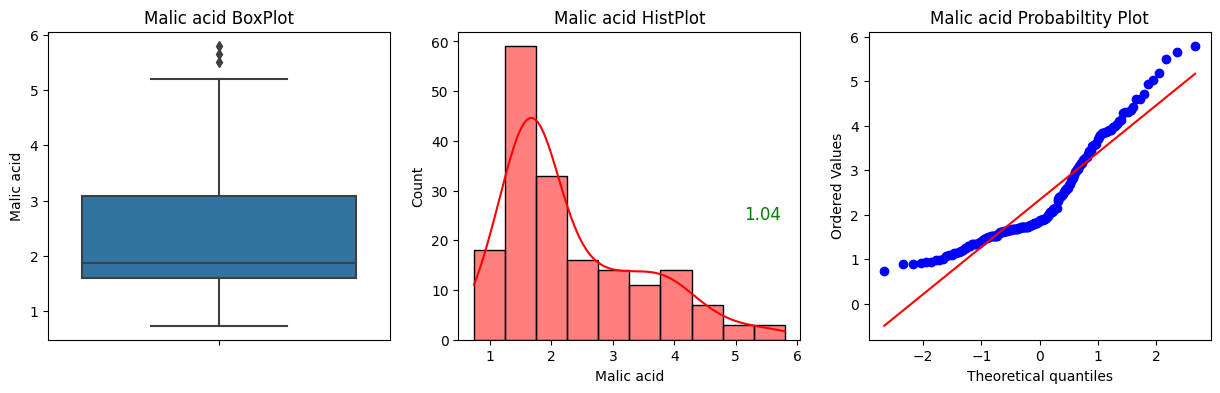

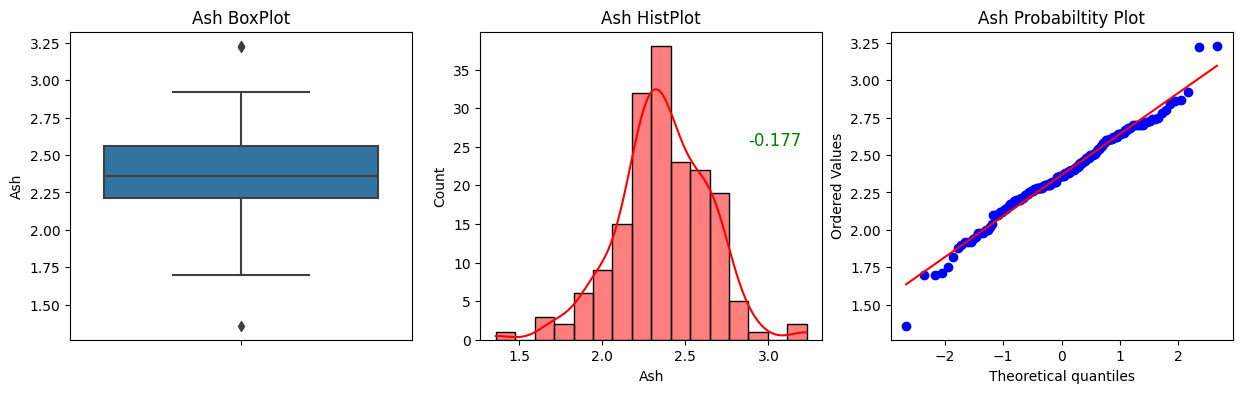

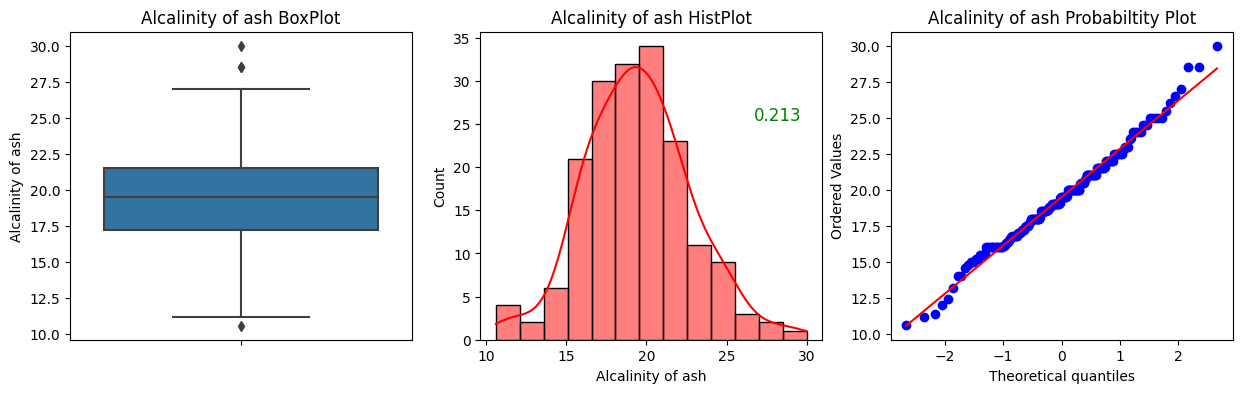

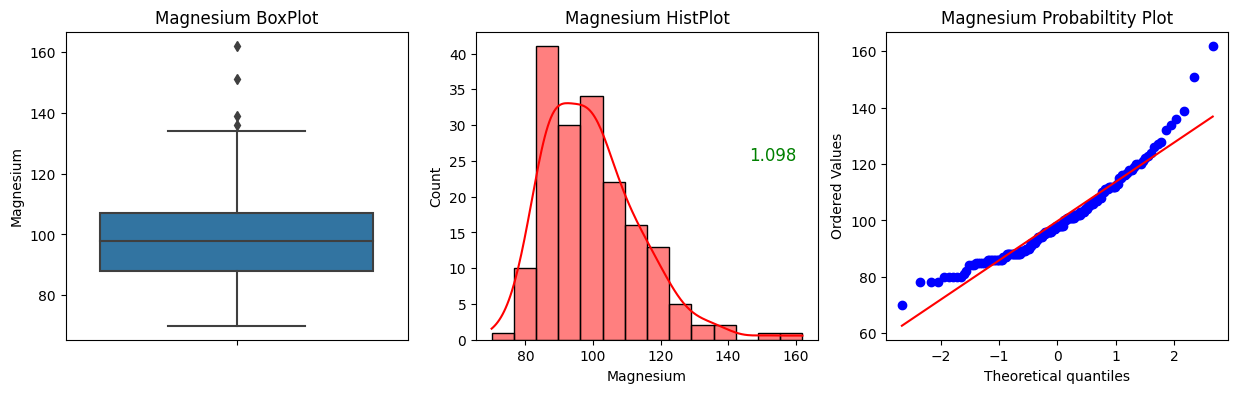

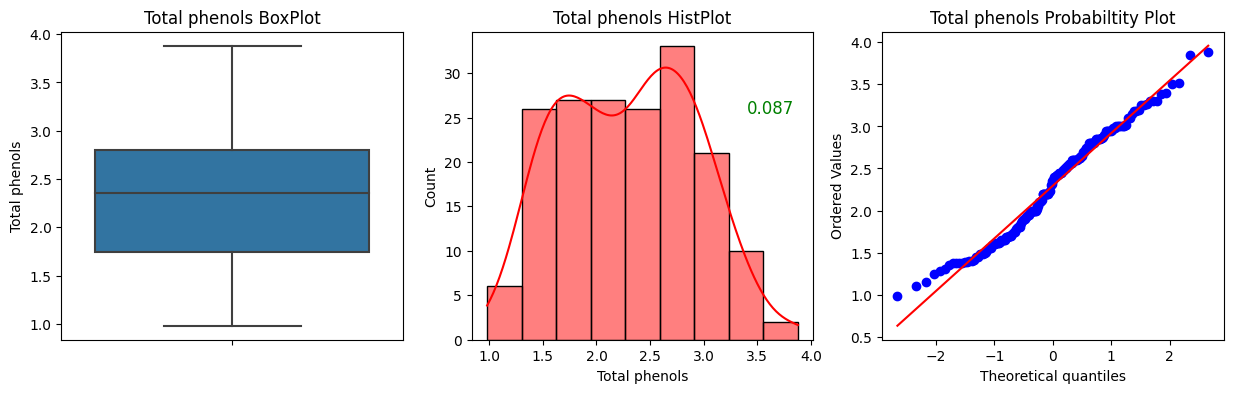

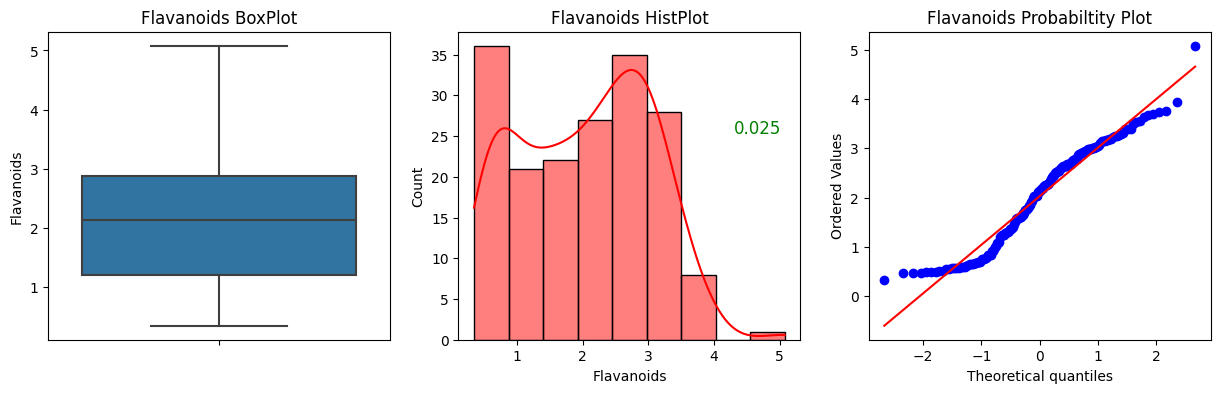

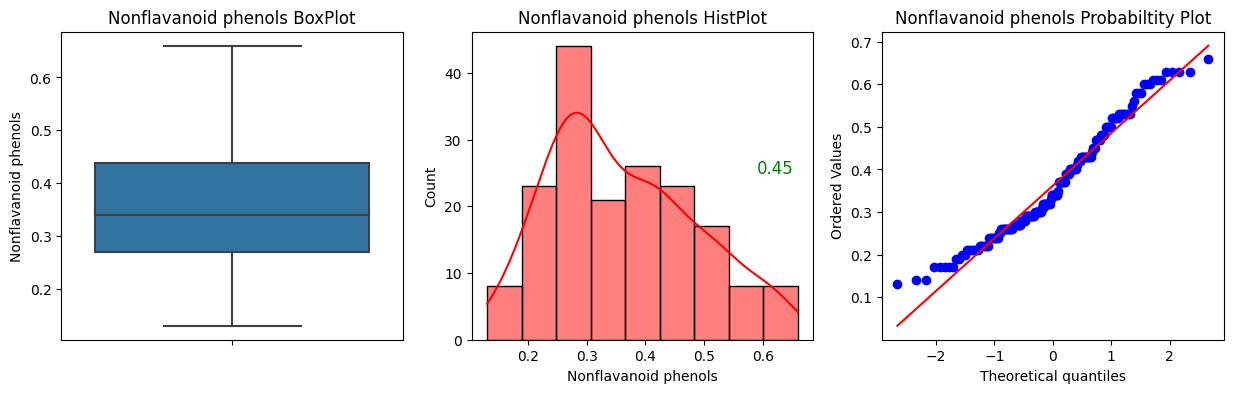

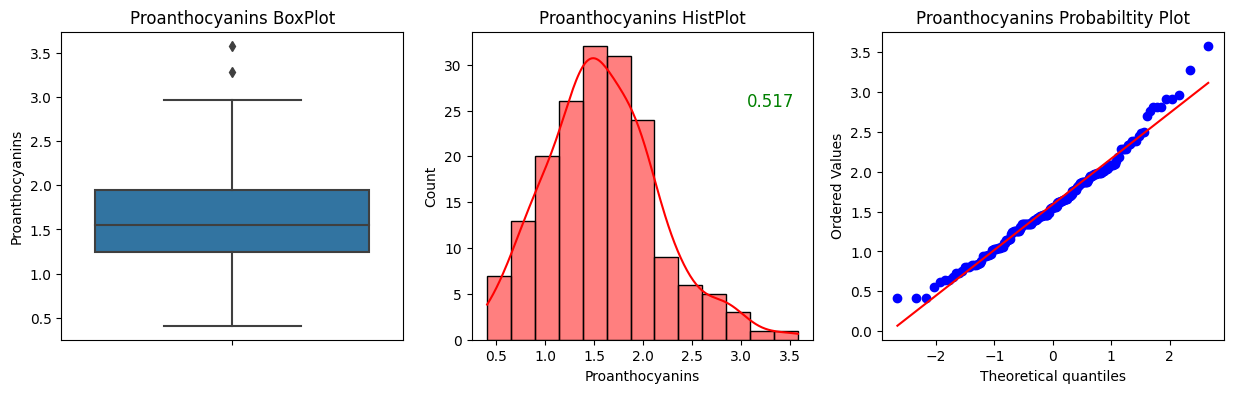

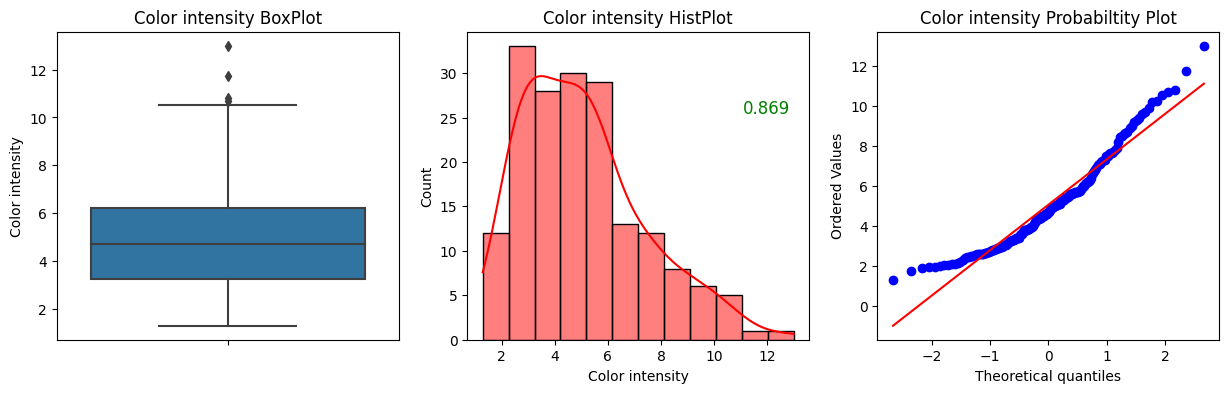

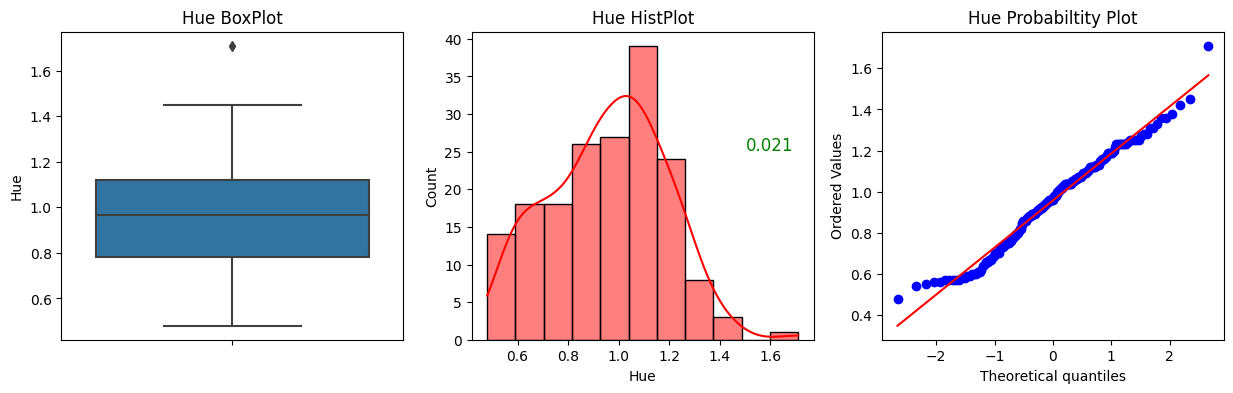

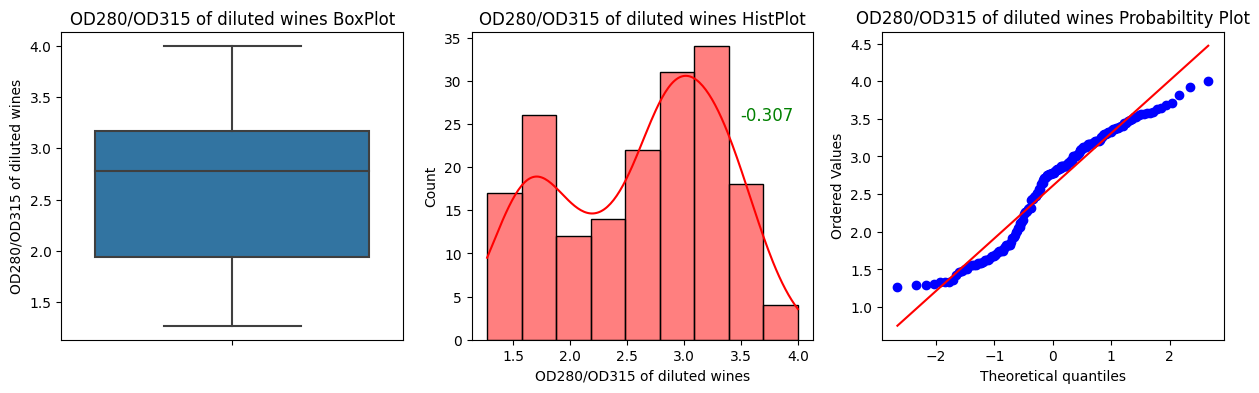

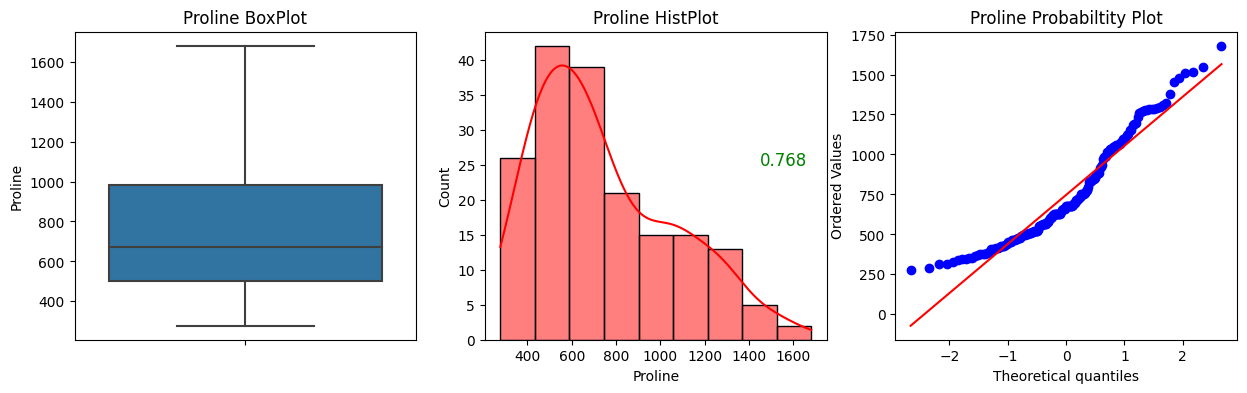

In [42]:
# For loop for iterating through the feature to call the above functions
for cols in df:
    if(cols != 'Class'):
        Check_skew(df,cols)

# Inference before Transformation :

1) Alcohol : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Alcohol is Skewed. But, 
            from Probability Plot we can say that Alcohol is skew.

2) Malic acid : Observing BoxPlot and HistPlot we say that Malic acid is Right Skewed and from Probability Plot we can say that
                alcohol is skew.

3) Ash : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Ash is Skewed. But, from 
        Probability Plot we can say that Ash is skew.

4) Alcalinity of ash :  Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Alcalinity of
        ash is Skewed. But, from Probability Plot we can say that Alcalinity of ash is skew.

5) Magnesium : Observing Boxplot we cannot say that it is Skewed and from Histplot it is clear that Magnesium is Right Skewed. 
        But, from Probability Plot we can say that Magnesium is skew.

6) Total Phenols : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Total Phenols is 
        Skewed. But, from Probability Plot we can say that Total Phenols is skew. And, there are less outliers.

7) Flavanoids : Observing Boxplot we cannot say that it is Right Skewed and from Histplot is not sure wheather Flavanoids is 
        Right or Left Skewed. But, from Probability Plot we can say that Flavanoids is skew.

8) Nonflavanoids phenols : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather 
        Nonflavanoids phenols is Skewed. But, from Probability Plot we can say that Nonflavanoids phenols is skew.

9) Proanthocyanins : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Proanthocyanins 
        is Skewed. But, from Probability Plot we can say that Proanthocyanins is skew(because it is not normal).

10) Color intensity: From Histplot is saying that Color intensity is right skewed and from Probabilty plot it is clear that 
        Color intensity is not normal therefore it is Skewed.

11) Hue : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Hue is Skewed(Skewness is 
        also very less). But, from Probability Plot we can say that Hue is skew.

12) OD280/OD315 of diluted wines :  Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather 
        OD280/OD315 of diluted wines is Right or Left Skewed. But, from Probability Plot we can say that OD280/OD315 of diluted
        wines is skew.

13) Proline: From Boxplot and Histplot we can say tha proline is right Skewed. And since, the Probablity Plot is not linear 
        therefore Proline is Skewed. 

# Conclusion : 
    All the features are Skewed. So we apply the transformation by boxcox function to transform the DataFrame(df).

In [60]:
# Transformation
transformed_data = {}   # To store the transform data in dictionary

def transformation(df,feature):    # Function to apply Boxcox.
    trans, lam = stats.boxcox(df[feature])
    return(trans)

for cols in df:          # Iterating from every col and transforming the data.
    if(cols == 'Class'):
            transformed_data[cols] = df[cols]
    else:
        transformed_data[cols] = transformation(df,cols)
        
ndf = pd.DataFrame(transformed_data)      # New dataframe for Transformed data
ndf

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,21.927542,0.498435,1.787608,8.226937,0.699041,1.496316,1.734838,-1.078493,1.057792,1.848571,0.039910,4.035440,4.968741
1,1,19.868334,0.532808,1.374804,6.245109,0.698760,1.386825,1.508768,-1.130654,0.264986,1.563014,0.049860,3.188416,4.961832
2,1,19.789199,0.763944,2.145671,9.478776,0.698774,1.496316,1.867648,-1.028992,1.405015,1.856632,0.029949,2.828647,5.020418
3,1,22.210558,0.609549,1.890549,8.735865,0.698915,2.217519,2.048911,-1.185841,0.980108,2.222884,-0.141185,3.267868,5.126201
4,1,19.947533,0.836270,2.454813,10.435768,0.698964,1.496316,1.455100,-0.832162,0.713148,1.547593,0.039910,2.463578,4.784747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,20.882826,1.374665,1.816892,10.239299,0.698686,0.623098,-0.414462,-0.599815,0.059243,2.207811,-0.368654,0.830624,4.788174
174,3,20.264960,1.135061,1.861009,11.207713,0.698787,0.723946,-0.259303,-0.755304,0.379369,2.145653,-0.305837,0.613335,4.794953
175,3,20.006974,1.196201,1.542896,10.041348,0.698982,0.545971,-0.324767,-0.755304,0.327170,2.539616,-0.421517,0.613335,4.848831
176,3,19.808976,0.836270,1.700374,10.041348,0.698982,0.597537,-0.335822,-0.583789,0.422139,2.429825,-0.410904,0.684770,4.851809


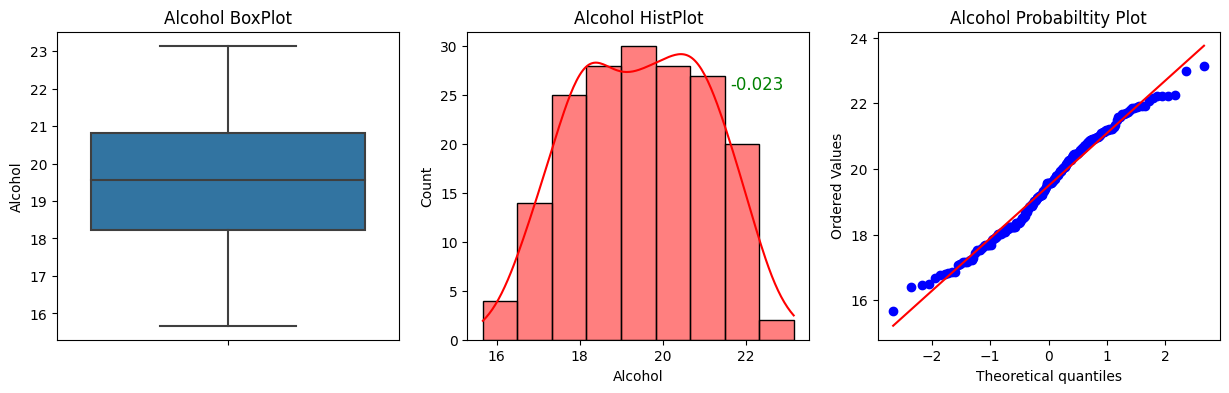

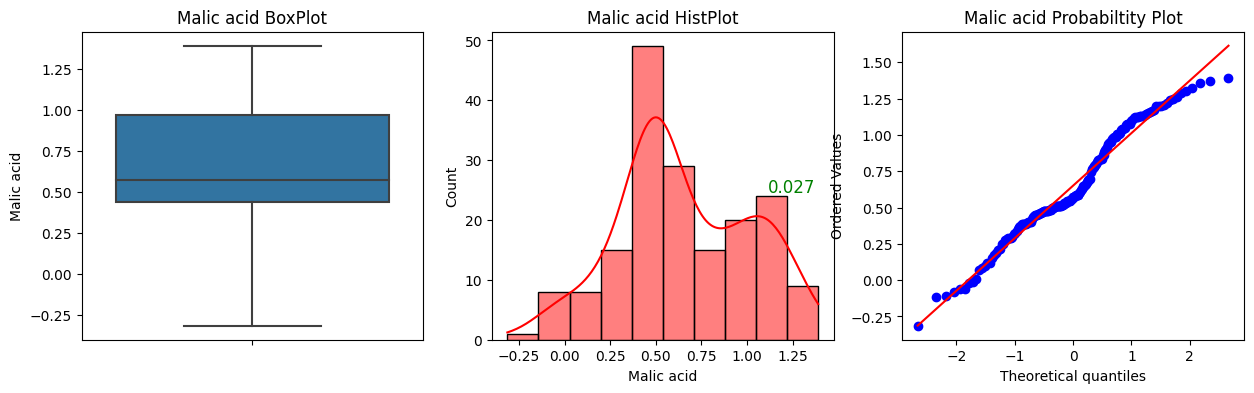

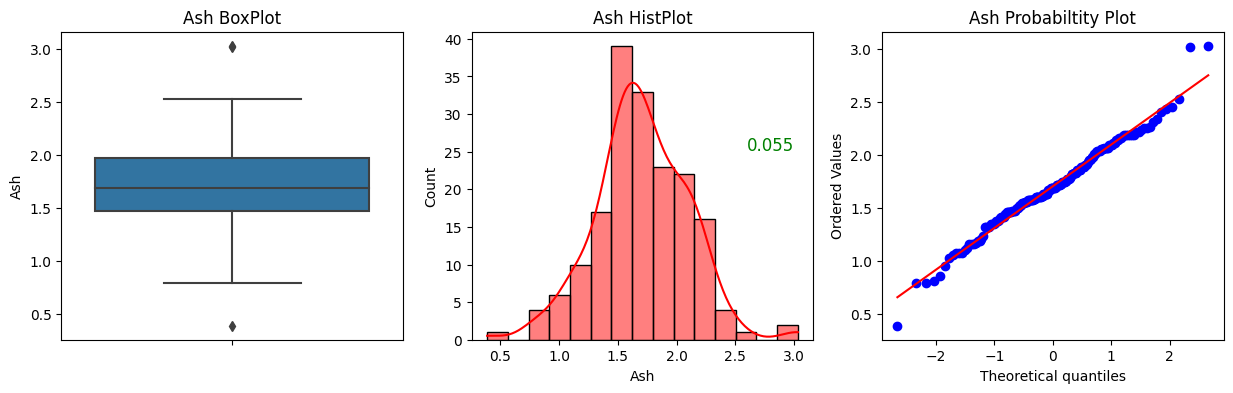

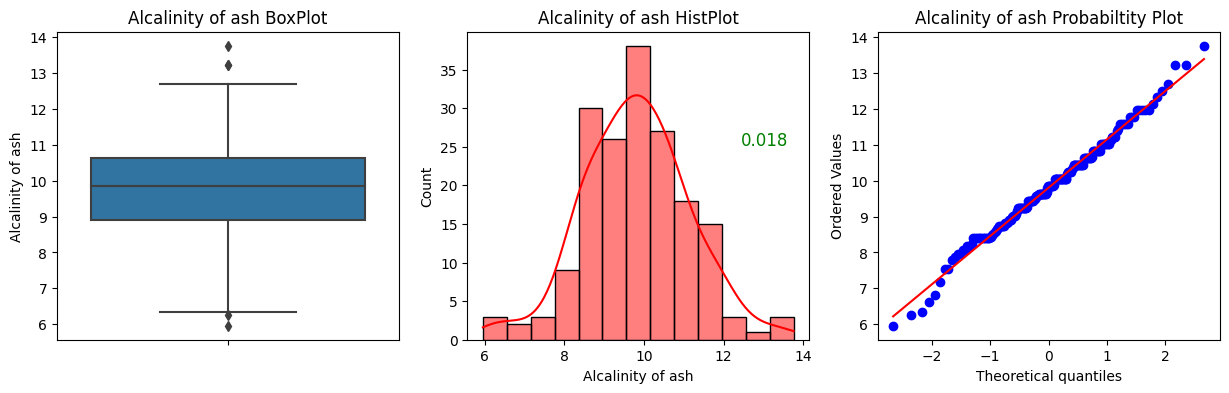

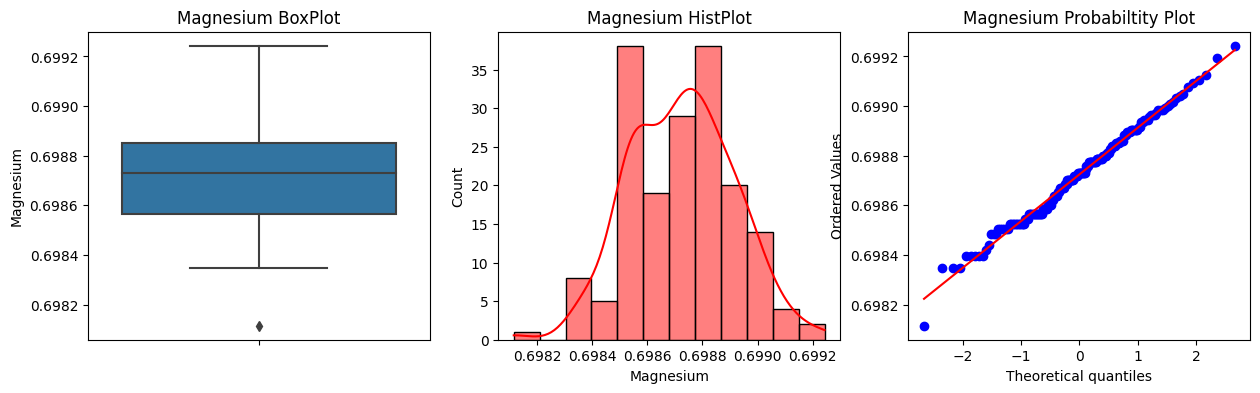

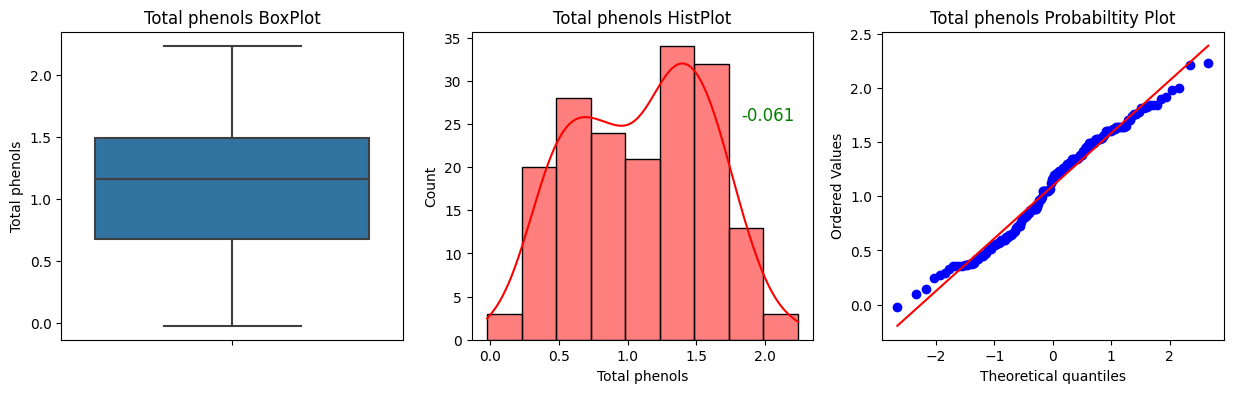

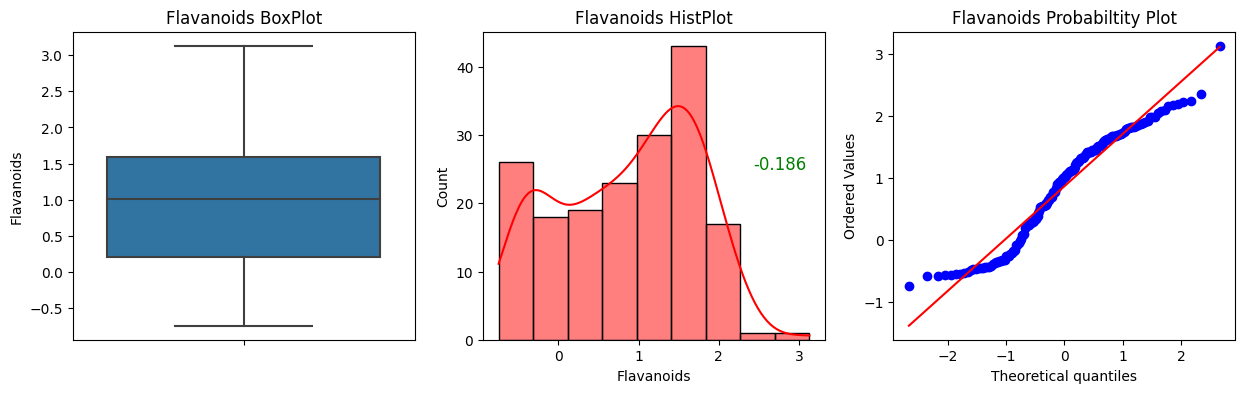

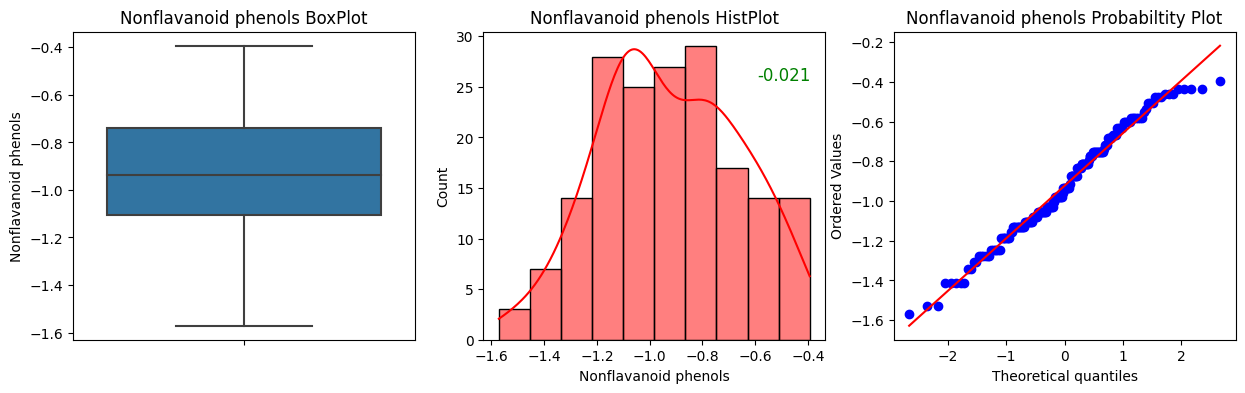

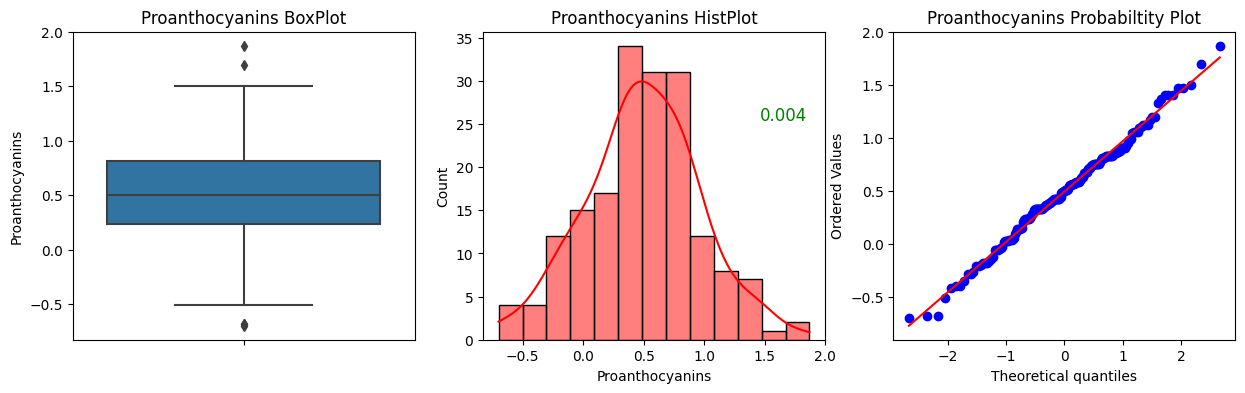

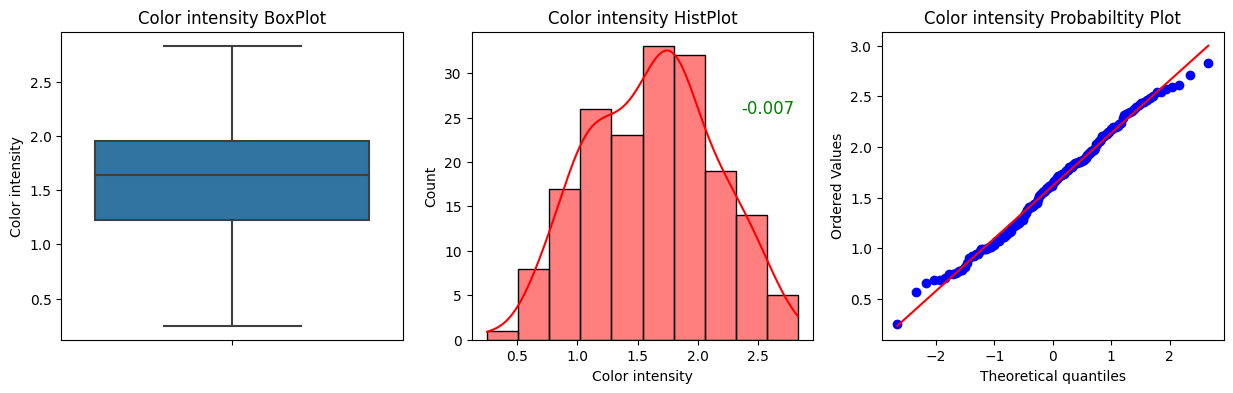

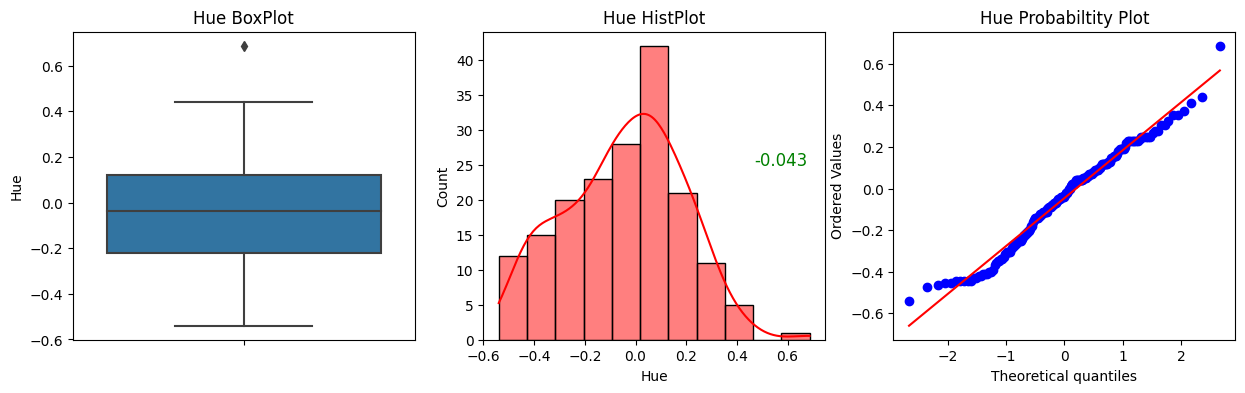

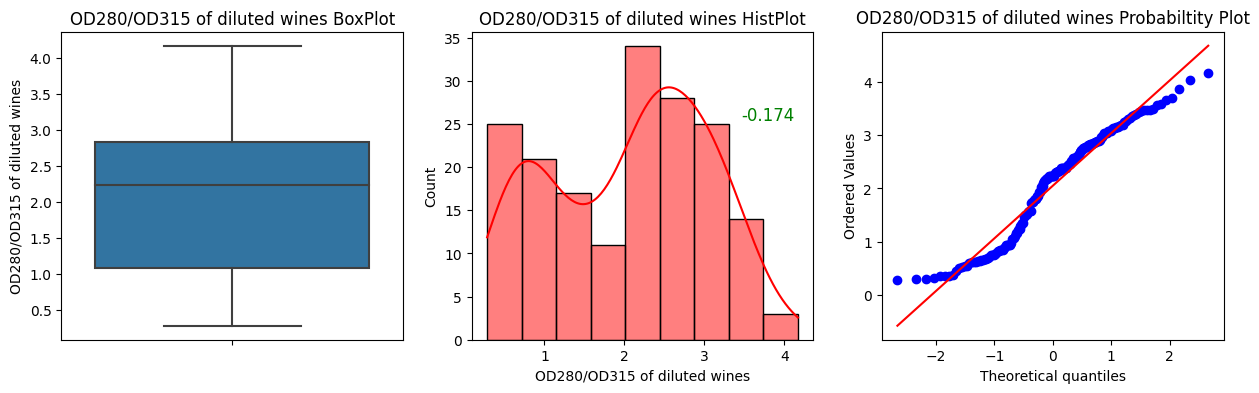

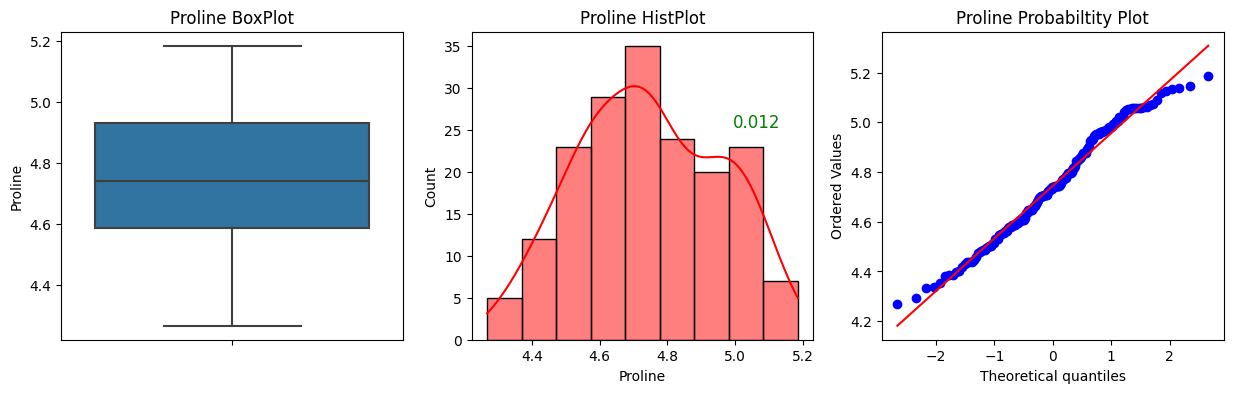

In [56]:
# Plotting Plots for new dataframe.
for cols in df:
    if(cols != 'Class'):
        Check_skew(ndf,cols)

In [59]:
# transformed data Skewness

ndf.skew()

Class                           0.107431
Alcohol                        -0.023100
Malic acid                      0.027055
Ash                             0.054520
Alcalinity of ash               0.017988
Magnesium                       0.006353
Total phenols                  -0.061031
Flavanoids                     -0.186089
Nonflavanoid phenols           -0.021171
Proanthocyanins                 0.004080
Color intensity                -0.007184
Hue                            -0.043357
OD280/OD315 of diluted wines   -0.173749
Proline                         0.012055
dtype: float64

# Transformed data Inference: 
We cannot say that there is no skewness in each column but they are reduced compared to before and we can verify by Probability Plot which are al most normal and having less outliers.